In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Removing features that very low in feature importance scale consistently.

In [2]:
df= pd.read_csv('Dataset_A3B_OH_343.csv')

In [3]:
df2=df.iloc[0:69,1:38]
df2 = df2.drop(columns=['M-Enth.fus', 'M-Elec.-ve', 'M-Surface.E', 'M-1st Ion E',
                        'M-Group', 'M-Work F.', 'M-Elec.Aff', 'Elec.-ve', 'cova .radii', 
                        'Group', 'OH_B.E']) 
df2

,M-At No.,M-At wt.,M-Density,M-M.P,M-B.P,M-Enth.atom,M-Enth.vap,M-Sp.ht Cap,M-cova .radii,M-At.radii,...,Enth.fus,Enth.atom,Enth.vap,Sp.ht Cap,Surface.E,1st Ion E,At.radii,Period,Work F.,Elec.Aff
0,79,196.96,19.30,1337.33,3129,368,330,129.1,136,174,...,17.20,431,378,445.0,1.92,737.10,149,4,5.24,112.0
1,79,196.96,19.30,1337.33,3129,368,330,129.1,136,174,...,7.35,131,119,388.0,0.33,906.40,142,4,3.63,-58.0
2,79,196.96,19.30,1337.33,3129,368,330,129.1,136,174,...,25.70,652,580,238.0,2.60,710.20,178,5,4.65,101.3
3,79,196.96,19.30,1337.33,3129,368,330,129.1,136,174,...,21.70,556,495,240.0,1.98,719.70,173,5,5.20,109.7
4,79,196.96,19.30,1337.33,3129,368,330,129.1,136,174,...,16.70,377,380,240.0,1.36,804.40,169,5,5.47,53.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,77,192.22,22.56,2739.00,4701,671,560,131.0,137,180,...,33.00,776,705,137.0,2.57,760.00,188,6,4.72,14.5
65,77,192.22,22.56,2739.00,4701,671,560,131.0,137,180,...,31.00,789,630,130.0,2.95,840.00,185,6,5.93,106.1
66,77,192.22,22.56,2739.00,4701,671,560,131.0,137,180,...,20.00,565,490,133.0,1.49,870.00,177,6,5.97,205.3
67,77,192.22,22.56,2739.00,4701,671,560,131.0,137,180,...,12.50,368,330,129.1,0.74,890.13,174,6,5.41,222.8


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df2)

In [6]:
pca = PCA(n_components=26)  # You can start by setting the number of components equal to the original feature set
pca.fit(X_scaled)

PCA(n_components=26)

In [7]:
X_pca = pca.fit_transform(X_scaled)  # Perform both fitting and transformation

# Retrieve cumulative explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)

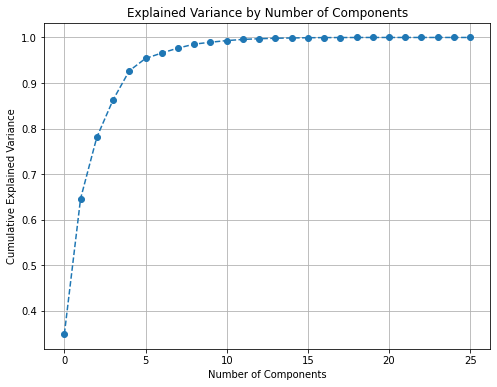

In [8]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)
import matplotlib.pyplot as plt
# Plotting the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(0, 26), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.grid(True)
plt.show()

In [9]:
variance_threshold = 0.95
n_components = np.argmax(explained_variance >= variance_threshold) + 1
print(f"Number of components to explain {variance_threshold * 100}% variance: {n_components}")

Number of components to explain 95.0% variance: 6


In [10]:
s = pd.DataFrame(X_scaled)
s

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.741098,0.732023,0.268391,-1.408641,-1.091952,-1.338493,-1.371946,-0.617364,0.043781,0.098959,...,-0.028249,-0.117547,-0.130462,1.434508,0.276972,-0.176862,-1.083930,-1.234456,0.499832,0.295111
1,0.741098,0.732023,0.268391,-1.408641,-1.091952,-1.338493,-1.371946,-0.617364,0.043781,0.098959,...,-1.251163,-1.792164,-1.822392,0.978669,-1.447579,1.621545,-1.513765,-1.234456,-1.797493,-2.167296
2,0.741098,0.732023,0.268391,-1.408641,-1.091952,-1.338493,-1.371946,-0.617364,0.043781,0.098959,...,1.027057,1.116088,1.189113,-0.220907,1.014516,-0.462610,0.696812,-0.034773,-0.342045,0.140124
3,0.741098,0.732023,0.268391,-1.408641,-1.091952,-1.338493,-1.371946,-0.617364,0.043781,0.098959,...,0.530442,0.580210,0.633847,-0.204913,0.342049,-0.361695,0.389788,-0.034773,0.442756,0.261796
4,0.741098,0.732023,0.268391,-1.408641,-1.091952,-1.338493,-1.371946,-0.617364,0.043781,0.098959,...,-0.090326,-0.418978,-0.117397,-0.204913,-0.330417,0.538039,0.144168,-0.034773,0.828021,-0.549350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,0.639031,0.643559,0.895495,0.921017,0.777336,0.964327,0.749537,-0.600665,0.147950,0.624205,...,1.933379,1.808263,2.005682,-1.028622,0.981977,0.066396,1.310861,1.164909,-0.242161,-1.117152
65,0.639031,0.643559,0.895495,0.921017,0.777336,0.964327,0.749537,-0.600665,0.147950,0.624205,...,1.685071,1.880829,1.515741,-1.084602,1.394134,0.916204,1.126647,1.164909,1.484400,0.209651
66,0.639031,0.643559,0.895495,0.921017,0.777336,0.964327,0.749537,-0.600665,0.147950,0.624205,...,0.319381,0.630449,0.601184,-1.060611,-0.189416,1.234882,0.635407,1.164909,1.541476,1.646538
67,0.639031,0.643559,0.895495,0.921017,0.777336,0.964327,0.749537,-0.600665,0.147950,0.624205,...,-0.611772,-0.469216,-0.444024,-1.091800,-1.002884,1.448715,0.451193,1.164909,0.742407,1.900021


In [11]:
pca=PCA(n_components=6)

In [12]:
pca.fit(X_scaled)

PCA(n_components=6)

In [13]:
x_pca=pca.transform(X_scaled)

In [14]:
x_pca.shape

(69, 6)

In [15]:
m = pd.DataFrame(x_pca)

In [16]:
m.columns = [f'Component_{i+1}' for i in range(6)]
m

,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6
0,-1.663888,-0.990399,-0.753877,3.318021,-0.385320,-0.961159
1,-3.961771,-3.333566,1.512998,2.492605,0.191754,2.422854
2,0.803588,1.302384,-1.058621,2.954874,1.753277,-0.643548
3,0.260166,0.886008,-0.143332,2.862043,1.007174,-0.841927
4,-0.587040,0.116236,0.895074,2.770463,0.344799,0.208938
...,...,...,...,...,...,...
64,5.194976,1.661646,-1.201185,-0.160683,1.775046,1.106434
65,5.396846,2.135385,-0.566387,0.278899,-0.228018,0.527757
66,3.885517,0.967214,1.883869,-0.304101,-1.400369,-0.349707
67,2.549433,-0.233354,3.350697,-0.837032,-1.512586,-0.135987


In [17]:
m.to_csv('PCA_add_6.csv', index=False)

In [ ]:
n = 156
new_df = m.iloc[n:]  #Comp_1 and Comp_2 for Cu_Pred
L = pd.DataFrame(new_df)
L

In [ ]:
L.to_csv('PCA_add_Cu_Pred.csv', index=False)

Positively correlated
